In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# After running fastANI, run script to collect the output into one file:
!python3 ../../bin/parse_fastANI.py fastANI_out fastANI_eval_20191125.txt fastANI_failed_20191125.txt

Traceback (most recent call last):
  File "../../bin/parse_fastANI.py", line 15, in <module>
    files=os.listdir(args.fastANI_dir)
FileNotFoundError: [Errno 2] No such file or directory: 'fastANI_out'


In [7]:
fastani_out=pd.read_csv('fastANI_eval_20191125.txt', sep='\t', index_col='sample')

In [8]:
fastani_out.head(5)

,GCF_000069185.1,GCF_000497265.2,GCF_003609715.1
sample,,,
SAMEA2275760,99.9589,96.8597,97.2039
SAMEA2070161,99.1752,96.8688,97.1003
SAMEA1464876,99.2234,96.9201,97.1350
SAMEA2275819,97.3361,98.5784,96.7592
SAMEA2275661,97.0505,98.6411,96.6734


## look at MAB ANI

Text(0.5, 0, 'ANI (%)')

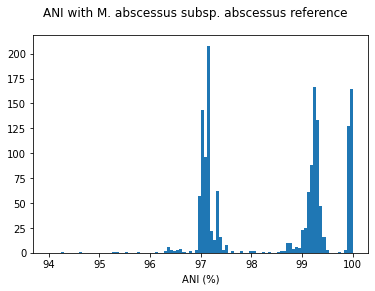

In [10]:
plt.hist(fastani_out['GCF_000069185.1'], range=(94,100), bins=100, label='mab')
plt.suptitle('ANI with M. abscessus subsp. abscessus reference')
plt.xlabel('ANI (%)')

## look at MAS ANI

Text(0.5, 0, 'ANI (%)')

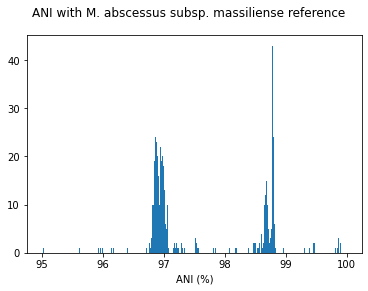

In [11]:
plt.hist(fastani_out['GCF_000497265.2'], range=(95,100), bins=1000)
plt.suptitle('ANI with M. abscessus subsp. massiliense reference')
plt.xlabel('ANI (%)')

## look at BOL ANI

Text(0.5, 0, 'ANI (%)')

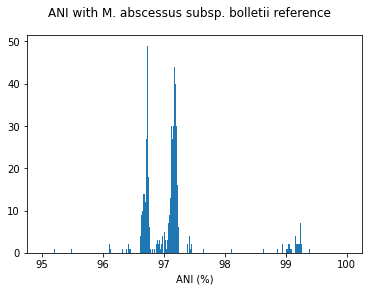

In [12]:
plt.hist(fastani_out['GCF_003609715.1'], range=(95,100),bins=1000)
plt.suptitle('ANI with M. abscessus subsp. bolletii reference')
plt.xlabel('ANI (%)')

### Roughly how many samples do I expect per subspecies based on the literature?

In [13]:
# bol:

1600*0.08

128.0

In [14]:
# mab:
1600*0.68


1088.0

In [15]:
# mas
1600*0.24

384.0

In [16]:
## expect about 130 bol samples, 1000 mab samples, 400 mas samples

## Try assigning every sample to the closest reference:

In [18]:
fastani_out['max_ani'] = fastani_out.idxmax(axis=1)

In [19]:
fastani_out['max_ani'].value_counts()

GCF_000069185.1    910
GCF_000497265.2    564
GCF_003609715.1     98
Name: max_ani, dtype: int64

These values match about what I would expect. 

### Now let's plot a distribution of ANI scores relative to each reference genome, colored by the closest subspecies assignment:

In [20]:
mab_hist=fastani_out[fastani_out['max_ani']=='GCF_000069185.1']
mas_hist=fastani_out[fastani_out['max_ani']=='GCF_000497265.2']
bol_hist=fastani_out[fastani_out['max_ani']=='GCF_003609715.1']

Text(0, 0.5, 'Number of samples')

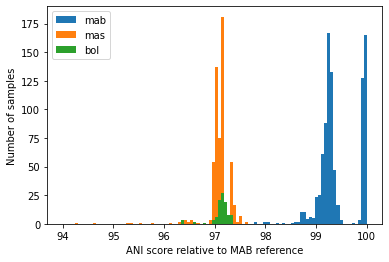

In [22]:
plt.hist(mab_hist['GCF_000069185.1'], range=(94,100), bins=100, label='mab')
plt.hist(mas_hist['GCF_000069185.1'], range=(94,100), bins=100, label='mas')
plt.hist(bol_hist['GCF_000069185.1'], range=(94,100), bins=100, label='bol')
plt.legend(loc='upper left')
plt.xlabel('ANI score relative to MAB reference')
plt.ylabel('Number of samples')

Text(0.5, 0.98, 'ANI with MAS reference, by subsp assignment')

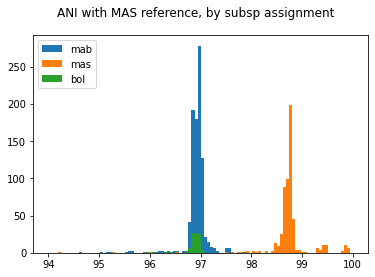

In [27]:
plt.hist(mab_hist['GCF_000497265.2'], range=(94,100), bins=100, label='mab')
plt.hist(mas_hist['GCF_000497265.2'], range=(94,100), bins=100, label='mas')
plt.hist(bol_hist['GCF_000497265.2'], range=(94,100), bins=100, label='bol')
plt.legend(loc='upper left')
plt.xlabel('ANI score relative to MAS reference')
plt.ylabel('Number of samples')

Text(0, 0.5, 'Number of samples')

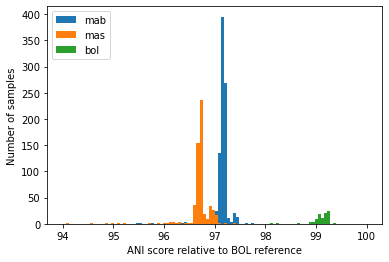

In [23]:
plt.hist(mab_hist['GCF_003609715.1'], range=(94,100), bins=100, label='mab')
plt.hist(mas_hist['GCF_003609715.1'], range=(94,100), bins=100, label='mas')
plt.hist(bol_hist['GCF_003609715.1'], range=(94,100), bins=100, label='bol')
plt.legend(loc='upper left')
plt.xlabel('ANI score relative to BOL reference')
plt.ylabel('Number of samples')

### examine cutoffs

MAB:

In [29]:
print(mab_hist['GCF_000069185.1'].max())
print(mab_hist['GCF_000069185.1'].min())

99.9979
97.2532


In [31]:
print(mas_hist['GCF_000069185.1'].max())
print(mas_hist['GCF_000069185.1'].min())

97.63
77.9567


In [32]:
print(bol_hist['GCF_000069185.1'].max())
print(bol_hist['GCF_000069185.1'].min())

97.3531
96.3536


MAS:

In [197]:
print(mab_hist['GCF_000497265.2'].max())
print(mab_hist['GCF_000497265.2'].min())

97.5696
94.6587


In [33]:
print(mas_hist['GCF_000497265.2'].max())
print(mas_hist['GCF_000497265.2'].min())

99.9393
78.1277


In [34]:
print(bol_hist['GCF_000497265.2'].max())
print(bol_hist['GCF_000497265.2'].min())

97.8451
95.8961


BOL:

In [35]:
print(mab_hist['GCF_003609715.1'].max())
print(mab_hist['GCF_000497265.2'].min())

97.7267
94.6587


In [36]:
print(mas_hist['GCF_003609715.1'].max())
print(mas_hist['GCF_000497265.2'].min())

97.419
78.1277


In [37]:
print(bol_hist['GCF_003609715.1'].max())
print(bol_hist['GCF_000497265.2'].min())

99.3946
95.8961


#### Based on these results we selected a subspecies threshold of 98% ANI with exactly one reference genome